In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Day 1

In [2]:
df = pd.read_csv('aoc_day1.csv', header=None)
df

,0
0,7jlncfksix7rjgrpglmn9
1,vcgkgxninerqjltdbhqzzpd4nine23
2,fx3
3,8nrbjbpjpnineseven
4,7qlfhcsnxn7fpfhjcgr6eightsevenjlpchjtzpztwo
...,...
995,54rvpqphbpxmcfjmcspsnhrjp
996,eightn2skzmpmtgqhvvfxgqonevtbfsmfklzspxdrgj
997,nine276rzshsrvncjrdzfxbmzzlvkhdlcc
998,sevenfivexgznfftgthree44


In [3]:
# init list to catch calibration values
calibration_values = []

# loop through each row and convert the line into a list of string values with each element in the list being its own string
for j in df[0]:
    single_list = [j[i:i+1] for i in range(0, len(j), 1)]
    digit_list = []
    # loop through the list we created above and transform each element into a integer and append it to a new list; the try/except statement will ensure we only capture digits and no letters
    for k in single_list:
        try:
            digit_list.append(int(k))
        except ValueError:
            pass
    calibration_values.append(str(digit_list[0])+str(digit_list[-1]))
# convert each calibration value into integers and sum them 
sum([eval(i) for i in calibration_values])

55488

### Part 2

In [4]:
# init list to catch calibration values
calibration_values = []

# create function that inserts the digit form into the string version of each number so we can call this and run the same loop from from part 1
def digit_conversion(string):
    digit_map = {'one': 'o1e', 'two': 't2o', 'three': 't3e', 'four': 'f4r', 'five': 'f5e', 'six': 's6x', 'seven': 's7n', 'eight': 'e8t', 'nine': 'n9e'}
    for word, digit in digit_map.items():
        string = string.replace(word, digit)
    return string

# loop through each row and convert the line into a list of string values with each element in the list being its own string
for j in df[0]:
    j = digit_conversion(j)
    single_list = [j[i:i+1] for i in range(0, len(j), 1)]
    digit_list = []
    # loop through the list we created above and transform each element into a integer and append it to a new list; the try/except statement will ensure we only capture digits and no letters
    for k in single_list:
        try:
            digit_list.append(int(k))
        except ValueError:
            pass
    calibration_values.append(str(digit_list[0])+str(digit_list[-1]))
# convert each calibration value into integers and sum them 
sum([eval(i) for i in calibration_values])

55614

# Day 2

In [5]:
df = pd.read_csv('aoc_day2.csv', header=None, names=['sets'])
df

,sets
0,"Game 1: 1 green, 1 blue, 1 red; 1 green, 8 red..."
1,"Game 2: 9 red, 7 green, 3 blue; 15 green, 2 bl..."
2,"Game 3: 3 red, 1 blue, 4 green; 6 red, 3 green..."
3,"Game 4: 2 blue, 2 green, 19 red; 3 blue, 11 re..."
4,"Game 5: 8 green, 1 red, 12 blue; 10 green, 6 r..."
...,...
95,"Game 96: 2 red, 2 green, 1 blue; 1 red, 4 gree..."
96,"Game 97: 4 red, 5 green; 5 blue, 3 red; 8 blue..."
97,"Game 98: 1 blue; 2 green, 1 red; 5 red, 2 gree..."
98,"Game 99: 6 blue, 5 red, 2 green; 9 red, 1 blue..."


In [6]:
# adds a new column for the game number so we can add these up later
df['game'] = range(1, 101)
# removes the 'Game ##: ' part from the first set so we can calculate this column like the rest
df['sets'] = df['sets'].apply(lambda x: x.split(':', 1)[1] if ':' in x else x)
df

,sets,game
0,"1 green, 1 blue, 1 red; 1 green, 8 red, 7 blu...",1
1,"9 red, 7 green, 3 blue; 15 green, 2 blue, 5 r...",2
2,"3 red, 1 blue, 4 green; 6 red, 3 green, 2 blu...",3
3,"2 blue, 2 green, 19 red; 3 blue, 11 red, 16 g...",4
4,"8 green, 1 red, 12 blue; 10 green, 6 red, 13 ...",5
...,...,...
95,"2 red, 2 green, 1 blue; 1 red, 4 green; 1 green",96
96,"4 red, 5 green; 5 blue, 3 red; 8 blue, 2 gree...",97
97,"1 blue; 2 green, 1 red; 5 red, 2 green; 4 red...",98
98,"6 blue, 5 red, 2 green; 9 red, 1 blue; 2 gree...",99


In [7]:
import re

# declare maximum value for each color
max_red = 12
max_green = 13
max_blue = 14

# init list for whether max is exceeded or not
max_exceeded = []

# loop through each game
for color_set in df['sets']:
    # init boolean for declaring if that game is possible
    exceeded = False
    
    # regex statement for each color that extracts the number in front of that color and checks if any of these numbers exceed the max number, changing the boolean if they do
    r_matches = re.findall(r'(\d{1,2}) red', color_set)
    for num in r_matches:
        if int(num) > max_red:
            exceeded = True
    g_matches = re.findall(r'(\d{1,2}) green', color_set)
    for num in g_matches:
        if int(num) > max_green:
            exceeded = True
    b_matches = re.findall(r'(\d{1,2}) blue', color_set)
    for num in b_matches:
        if int(num) > max_blue:
            exceeded = True

    # append the boolean check for each game
    max_exceeded.append(exceeded)

# turns list into new column
df['max_exceeded'] = max_exceeded
df

,sets,game,max_exceeded
0,"1 green, 1 blue, 1 red; 1 green, 8 red, 7 blu...",1,False
1,"9 red, 7 green, 3 blue; 15 green, 2 blue, 5 r...",2,True
2,"3 red, 1 blue, 4 green; 6 red, 3 green, 2 blu...",3,True
3,"2 blue, 2 green, 19 red; 3 blue, 11 red, 16 g...",4,True
4,"8 green, 1 red, 12 blue; 10 green, 6 red, 13 ...",5,False
...,...,...,...
95,"2 red, 2 green, 1 blue; 1 red, 4 green; 1 green",96,False
96,"4 red, 5 green; 5 blue, 3 red; 8 blue, 2 gree...",97,False
97,"1 blue; 2 green, 1 red; 5 red, 2 green; 4 red...",98,False
98,"6 blue, 5 red, 2 green; 9 red, 1 blue; 2 gree...",99,False


In [8]:
# use a mask to filter out games that weren't possible
mask = df['max_exceeded'] == False
possible_games = df.loc[mask, 'game']
# add up the sum of the game IDs that were possible
sum(possible_games)

3035

### Part 2

In [9]:
# init power list
power_list = []

# loop through each game
for color_set in df['sets']:
    #init power value for each row
    power = 0
    
    # same regex statement to extract numbers but now I am just capturing the minimum value and calculating the power
    r_matches = re.findall(r'(\d{1,2}) red', color_set)
    r_matches = [eval(i) for i in r_matches]
    power = max(r_matches)
    g_matches = re.findall(r'(\d{1,2}) green', color_set)
    g_matches = [eval(i) for i in g_matches]
    power *= max(g_matches)
    b_matches = re.findall(r'(\d{1,2}) blue', color_set)
    b_matches = [eval(i) for i in b_matches]
    power *= max(b_matches)

    # append the power for each game
    power_list.append(power)

# sum the powers for each game
sum(power_list)

66027

# Day 3

In [10]:
#load in schematic
schematic = list(open('aoc_day3.txt'))

In [11]:
import re

# init symbols dict
symbols = {}
# loop over rows and columns to find the symbols and capture their x,y coordinate
for x in range(len(schematic)):
    for y in range(len(schematic[x].rstrip())):
        if schematic[x][y] not in '0123456789.':
            symbols[(x, y)] = []

# loop through rows and columns of schematic
for row_index, row in enumerate(schematic):
    for number_match in re.finditer(r'\d+', row):
        # capture the whole number
        number = int(number_match.group())

        # loop to create a 'filter' like what we use for CNNs that captures the box around the number
        adjacent_cells_window = set()
        for adj_row in (row_index - 1, row_index, row_index + 1):
            for adj_col in range(number_match.start() - 1, number_match.end() + 1):
                adjacent_cells_window.add((adj_row, adj_col))

        # if a symbol from our dict is captured in the filter then append that number to the list
        for cell in adjacent_cells_window & symbols.keys():
            symbols[cell].append(number)

# sum all the numbers in the symbols dict and then sum up all of these sums to get the total of the part numbers
total_part_numbers = sum(sum(numbers_list) for numbers_list in symbols.values())
total_part_numbers

517021

### Part 2

In [12]:
import math

# init symbols dict
symbols = {}

# adjusts this from the code above to just view '*' as the only symbol
symbols = {}
for x in range(len(schematic)):
    for y in range(len(schematic[x].rstrip())):
        if schematic[x][y] == '*':
            symbols[(x, y)] = []

# loop through rows and columns of schematic
for row_index, row in enumerate(schematic):
    for number_match in re.finditer(r'\d+', row):
        # capture the whole number
        number = int(number_match.group())

        # loop to create a 'filter' like what we use for CNNs that captures the box around the number
        adjacent_cells_window = set()
        for adj_row in (row_index - 1, row_index, row_index + 1):
            for adj_col in range(number_match.start() - 1, number_match.end() + 1):
                adjacent_cells_window.add((adj_row, adj_col))

        # if a symbol from our dict is captured in the filter then append that number to the list
        for cell in adjacent_cells_window & symbols.keys():
            symbols[cell].append(number)

# find the gears with exactly two numbers in the dict; multiply these together and then add up all these gear ratios to get the total
total_gear_ratios = sum(math.prod(gear) for gear in symbols.values() if len(gear) == 2)
total_gear_ratios

81296995

# Day 4

In [13]:
df = pd.read_csv('aoc_day4.csv', header=None, names=['cards'])
df

,cards
0,Card 1: 20 72 30 38 18 65 6 55 70 27 | 12 2...
1,Card 2: 15 98 12 3 20 60 58 54 34 18 | 98 2...
2,Card 3: 47 97 2 80 89 56 66 85 62 46 | 78 9...
3,Card 4: 60 59 88 14 53 46 96 29 99 37 | 52 4...
4,Card 5: 44 46 42 9 65 98 97 67 72 22 | 80 1...
...,...
182,Card 183: 58 73 31 77 33 10 49 92 28 25 | 39 ...
183,Card 184: 10 41 56 32 84 29 85 26 34 27 | 6 ...
184,Card 185: 95 13 15 61 49 19 60 21 33 87 | 30 3...
185,Card 186: 41 48 94 68 60 15 22 55 84 2 | 57 5...


In [14]:
# remove the card number info
df['cards'] = df['cards'].apply(lambda x: x.split(':', 1)[1] if ':' in x else x)
# split the cards into separate columns for the winning numbers and the numbers on our card
df[['winning_numbers', 'our_numbers']] = df['cards'].str.split('|', expand=True)
df

,cards,winning_numbers,our_numbers
0,20 72 30 38 18 65 6 55 70 27 | 12 28 47 50 6...,20 72 30 38 18 65 6 55 70 27,12 28 47 50 60 17 14 25 41 95 66 88 61 52 76 ...
1,15 98 12 3 20 60 58 54 34 18 | 98 23 12 19 6...,15 98 12 3 20 60 58 54 34 18,98 23 12 19 61 38 11 43 58 97 63 10 49 67 44 ...
2,47 97 2 80 89 56 66 85 62 46 | 78 97 47 14 1...,47 97 2 80 89 56 66 85 62 46,78 97 47 14 15 85 42 66 24 28 54 46 89 62 80 ...
3,60 59 88 14 53 46 96 29 99 37 | 52 46 92 26 7...,60 59 88 14 53 46 96 29 99 37,52 46 92 26 72 74 99 38 7 65 43 63 39 36 44 ...
4,44 46 42 9 65 98 97 67 72 22 | 80 14 29 39 9...,44 46 42 9 65 98 97 67 72 22,80 14 29 39 98 64 9 46 52 24 69 22 51 65 66 ...
...,...,...,...
182,58 73 31 77 33 10 49 92 28 25 | 39 3 96 41 4...,58 73 31 77 33 10 49 92 28 25,39 3 96 41 45 32 82 79 8 21 36 9 6 17 84 ...
183,10 41 56 32 84 29 85 26 34 27 | 6 4 9 38 2...,10 41 56 32 84 29 85 26 34 27,6 4 9 38 25 26 8 86 68 87 11 30 5 79 78 ...
184,95 13 15 61 49 19 60 21 33 87 | 30 36 52 88 2...,95 13 15 61 49 19 60 21 33 87,30 36 52 88 23 65 95 25 53 51 77 32 66 31 68 ...
185,41 48 94 68 60 15 22 55 84 2 | 57 53 9 50 ...,41 48 94 68 60 15 22 55 84 2,57 53 9 50 4 16 11 62 61 6 46 52 8 35 23 ...


In [15]:
# function to convert the list values for a column into integers; used for the finding the matches in the next step
def convert_to_int(column):
    return [int(x) for x in column.strip().split()]

# apply this function to the winning numbers and our numbers columns
df['winning_numbers'] = df['winning_numbers'].apply(convert_to_int)
df['our_numbers'] = df['our_numbers'].apply(convert_to_int)
df

,cards,winning_numbers,our_numbers
0,20 72 30 38 18 65 6 55 70 27 | 12 28 47 50 6...,"[20, 72, 30, 38, 18, 65, 6, 55, 70, 27]","[12, 28, 47, 50, 60, 17, 14, 25, 41, 95, 66, 8..."
1,15 98 12 3 20 60 58 54 34 18 | 98 23 12 19 6...,"[15, 98, 12, 3, 20, 60, 58, 54, 34, 18]","[98, 23, 12, 19, 61, 38, 11, 43, 58, 97, 63, 1..."
2,47 97 2 80 89 56 66 85 62 46 | 78 97 47 14 1...,"[47, 97, 2, 80, 89, 56, 66, 85, 62, 46]","[78, 97, 47, 14, 15, 85, 42, 66, 24, 28, 54, 4..."
3,60 59 88 14 53 46 96 29 99 37 | 52 46 92 26 7...,"[60, 59, 88, 14, 53, 46, 96, 29, 99, 37]","[52, 46, 92, 26, 72, 74, 99, 38, 7, 65, 43, 63..."
4,44 46 42 9 65 98 97 67 72 22 | 80 14 29 39 9...,"[44, 46, 42, 9, 65, 98, 97, 67, 72, 22]","[80, 14, 29, 39, 98, 64, 9, 46, 52, 24, 69, 22..."
...,...,...,...
182,58 73 31 77 33 10 49 92 28 25 | 39 3 96 41 4...,"[58, 73, 31, 77, 33, 10, 49, 92, 28, 25]","[39, 3, 96, 41, 45, 32, 82, 79, 8, 21, 36, 9, ..."
183,10 41 56 32 84 29 85 26 34 27 | 6 4 9 38 2...,"[10, 41, 56, 32, 84, 29, 85, 26, 34, 27]","[6, 4, 9, 38, 25, 26, 8, 86, 68, 87, 11, 30, 5..."
184,95 13 15 61 49 19 60 21 33 87 | 30 36 52 88 2...,"[95, 13, 15, 61, 49, 19, 60, 21, 33, 87]","[30, 36, 52, 88, 23, 65, 95, 25, 53, 51, 77, 3..."
185,41 48 94 68 60 15 22 55 84 2 | 57 53 9 50 ...,"[41, 48, 94, 68, 60, 15, 22, 55, 84, 2]","[57, 53, 9, 50, 4, 16, 11, 62, 61, 6, 46, 52, ..."


In [16]:
# init matches list
matches = []
# loop through both numbers columns using the set feature to find matches and then append those to a list
for i, j in zip(df['winning_numbers'], df['our_numbers']):
    if set(i) & set(j):
        matches.append(list(set(i) & set(j)))
    else:
        matches.append([0])
# convert the matches into a new column
df['matches'] = matches
df

,cards,winning_numbers,our_numbers,matches
0,20 72 30 38 18 65 6 55 70 27 | 12 28 47 50 6...,"[20, 72, 30, 38, 18, 65, 6, 55, 70, 27]","[12, 28, 47, 50, 60, 17, 14, 25, 41, 95, 66, 8...",[0]
1,15 98 12 3 20 60 58 54 34 18 | 98 23 12 19 6...,"[15, 98, 12, 3, 20, 60, 58, 54, 34, 18]","[98, 23, 12, 19, 61, 38, 11, 43, 58, 97, 63, 1...","[98, 58, 12, 20]"
2,47 97 2 80 89 56 66 85 62 46 | 78 97 47 14 1...,"[47, 97, 2, 80, 89, 56, 66, 85, 62, 46]","[78, 97, 47, 14, 15, 85, 42, 66, 24, 28, 54, 4...","[97, 2, 66, 46, 47, 80, 85, 56, 89, 62]"
3,60 59 88 14 53 46 96 29 99 37 | 52 46 92 26 7...,"[60, 59, 88, 14, 53, 46, 96, 29, 99, 37]","[52, 46, 92, 26, 72, 74, 99, 38, 7, 65, 43, 63...","[99, 46]"
4,44 46 42 9 65 98 97 67 72 22 | 80 14 29 39 9...,"[44, 46, 42, 9, 65, 98, 97, 67, 72, 22]","[80, 14, 29, 39, 98, 64, 9, 46, 52, 24, 69, 22...","[65, 98, 67, 97, 72, 9, 42, 44, 46, 22]"
...,...,...,...,...
182,58 73 31 77 33 10 49 92 28 25 | 39 3 96 41 4...,"[58, 73, 31, 77, 33, 10, 49, 92, 28, 25]","[39, 3, 96, 41, 45, 32, 82, 79, 8, 21, 36, 9, ...",[0]
183,10 41 56 32 84 29 85 26 34 27 | 6 4 9 38 2...,"[10, 41, 56, 32, 84, 29, 85, 26, 34, 27]","[6, 4, 9, 38, 25, 26, 8, 86, 68, 87, 11, 30, 5...",[26]
184,95 13 15 61 49 19 60 21 33 87 | 30 36 52 88 2...,"[95, 13, 15, 61, 49, 19, 60, 21, 33, 87]","[30, 36, 52, 88, 23, 65, 95, 25, 53, 51, 77, 3...",[95]
185,41 48 94 68 60 15 22 55 84 2 | 57 53 9 50 ...,"[41, 48, 94, 68, 60, 15, 22, 55, 84, 2]","[57, 53, 9, 50, 4, 16, 11, 62, 61, 6, 46, 52, ...",[22]


In [17]:
# convert the games with no matches to NaN and then drop these rows
df['matches'] = df['matches'].apply(lambda x: np.nan if x == [0] else x)
df2 = df.copy() # create copy for part 2
df.dropna(inplace=True)
df

,cards,winning_numbers,our_numbers,matches
1,15 98 12 3 20 60 58 54 34 18 | 98 23 12 19 6...,"[15, 98, 12, 3, 20, 60, 58, 54, 34, 18]","[98, 23, 12, 19, 61, 38, 11, 43, 58, 97, 63, 1...","[98, 58, 12, 20]"
2,47 97 2 80 89 56 66 85 62 46 | 78 97 47 14 1...,"[47, 97, 2, 80, 89, 56, 66, 85, 62, 46]","[78, 97, 47, 14, 15, 85, 42, 66, 24, 28, 54, 4...","[97, 2, 66, 46, 47, 80, 85, 56, 89, 62]"
3,60 59 88 14 53 46 96 29 99 37 | 52 46 92 26 7...,"[60, 59, 88, 14, 53, 46, 96, 29, 99, 37]","[52, 46, 92, 26, 72, 74, 99, 38, 7, 65, 43, 63...","[99, 46]"
4,44 46 42 9 65 98 97 67 72 22 | 80 14 29 39 9...,"[44, 46, 42, 9, 65, 98, 97, 67, 72, 22]","[80, 14, 29, 39, 98, 64, 9, 46, 52, 24, 69, 22...","[65, 98, 67, 97, 72, 9, 42, 44, 46, 22]"
5,53 92 3 77 46 68 11 23 81 88 | 42 3 92 4 2...,"[53, 92, 3, 77, 46, 68, 11, 23, 81, 88]","[42, 3, 92, 4, 23, 43, 62, 81, 51, 1, 29, 88, ...","[3, 68, 11, 77, 46, 81, 53, 23, 88, 92]"
...,...,...,...,...
180,58 60 47 94 81 55 51 3 72 19 | 10 42 23 1 1...,"[58, 60, 47, 94, 81, 55, 51, 3, 72, 19]","[10, 42, 23, 1, 18, 21, 82, 16, 96, 45, 31, 57...",[60]
181,53 98 12 49 5 26 90 64 71 92 | 25 81 61 46 6...,"[53, 98, 12, 49, 5, 26, 90, 64, 71, 92]","[25, 81, 61, 46, 62, 6, 70, 91, 27, 30, 52, 21...",[49]
183,10 41 56 32 84 29 85 26 34 27 | 6 4 9 38 2...,"[10, 41, 56, 32, 84, 29, 85, 26, 34, 27]","[6, 4, 9, 38, 25, 26, 8, 86, 68, 87, 11, 30, 5...",[26]
184,95 13 15 61 49 19 60 21 33 87 | 30 36 52 88 2...,"[95, 13, 15, 61, 49, 19, 60, 21, 33, 87]","[30, 36, 52, 88, 23, 65, 95, 25, 53, 51, 77, 3...",[95]


In [18]:
# capture the amount of matches
df['count'] = df['matches'].apply(lambda x: len(x))
# calc the score for each row
df['score'] = df['count'].apply(lambda x: 2**(x-1))
# sum the scores for each game
sum(df['score'])

22674

### Part 2

In [19]:
# use the copy created above and re-add the count column, but now to adjust for the NaN values
df2['count'] = df2['matches'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df2

,cards,winning_numbers,our_numbers,matches,count
0,20 72 30 38 18 65 6 55 70 27 | 12 28 47 50 6...,"[20, 72, 30, 38, 18, 65, 6, 55, 70, 27]","[12, 28, 47, 50, 60, 17, 14, 25, 41, 95, 66, 8...",NaN,0
1,15 98 12 3 20 60 58 54 34 18 | 98 23 12 19 6...,"[15, 98, 12, 3, 20, 60, 58, 54, 34, 18]","[98, 23, 12, 19, 61, 38, 11, 43, 58, 97, 63, 1...","[98, 58, 12, 20]",4
2,47 97 2 80 89 56 66 85 62 46 | 78 97 47 14 1...,"[47, 97, 2, 80, 89, 56, 66, 85, 62, 46]","[78, 97, 47, 14, 15, 85, 42, 66, 24, 28, 54, 4...","[97, 2, 66, 46, 47, 80, 85, 56, 89, 62]",10
3,60 59 88 14 53 46 96 29 99 37 | 52 46 92 26 7...,"[60, 59, 88, 14, 53, 46, 96, 29, 99, 37]","[52, 46, 92, 26, 72, 74, 99, 38, 7, 65, 43, 63...","[99, 46]",2
4,44 46 42 9 65 98 97 67 72 22 | 80 14 29 39 9...,"[44, 46, 42, 9, 65, 98, 97, 67, 72, 22]","[80, 14, 29, 39, 98, 64, 9, 46, 52, 24, 69, 22...","[65, 98, 67, 97, 72, 9, 42, 44, 46, 22]",10
...,...,...,...,...,...
182,58 73 31 77 33 10 49 92 28 25 | 39 3 96 41 4...,"[58, 73, 31, 77, 33, 10, 49, 92, 28, 25]","[39, 3, 96, 41, 45, 32, 82, 79, 8, 21, 36, 9, ...",NaN,0
183,10 41 56 32 84 29 85 26 34 27 | 6 4 9 38 2...,"[10, 41, 56, 32, 84, 29, 85, 26, 34, 27]","[6, 4, 9, 38, 25, 26, 8, 86, 68, 87, 11, 30, 5...",[26],1
184,95 13 15 61 49 19 60 21 33 87 | 30 36 52 88 2...,"[95, 13, 15, 61, 49, 19, 60, 21, 33, 87]","[30, 36, 52, 88, 23, 65, 95, 25, 53, 51, 77, 3...",[95],1
185,41 48 94 68 60 15 22 55 84 2 | 57 53 9 50 ...,"[41, 48, 94, 68, 60, 15, 22, 55, 84, 2]","[57, 53, 9, 50, 4, 16, 11, 62, 61, 6, 46, 52, ...",[22],1


In [20]:
# define function to count copies and their total sum
def copy_counter():
    # create list of ones for each card
    cards = [1] * len(df2['count'])
    # loop through counts and searches the indices of the cards ahead of it depending on the value of that count
    for i, count in enumerate(df2['count']):
        for j in range(i + 1, min(i + 1 + count, len(df2['count']))):
            # counts the copies for each card
            cards[j] += cards[i]
    # return the total sum of copies
    return sum(cards)

copy_counter()

5747443

# Day 5

In [21]:
### Didn't know where to start with this problem so I referrenced jonathanpaulson for this section of code which can be found at https://github.com/jonathanpaulson/AdventOfCode/blob/master/2023/5.py

# read in almanac
almanac = open('aoc_day5.txt').read().strip()

# separate the map sections
sections = almanac.split('\n\n')
seed_num, *maps = sections
# grab the original seed numbers
seed_num = [int(x) for x in seed_num.split(':')[1].split()]
seed_num

[858905075,
 56936593,
 947763189,
 267019426,
 206349064,
 252409474,
 660226451,
 92561087,
 752930744,
 24162055,
 75704321,
 63600948,
 3866217991,
 323477533,
 3356941271,
 54368890,
 1755537789,
 475537300,
 1327269841,
 427659734]

In [22]:
# function to create a list of tuples for the maps holding the destination, source, and length info
def convert_map(line):
    lines = line.split('\n')[1:]
    return [[int(x) for x in line.split()] for line in lines]

# function that uses map 'keys' and the seed number to find the location for that seed
def find_seed_location(map_key, seed):
    for (destination, source, length) in map_key:
        if source <= seed < source + length:
            return seed + destination - source
    return seed

# use the convert_map fn on each map and store them
keys = [convert_map(line) for line in maps]

# init list to store locations
locations = []
# loop through seed and the map keys and run these through our find location fn and then append the results to our locations list
for i in seed_num:
    for j in keys:
        i = find_seed_location(j, i)
    locations.append(i)

# lowest location number
min(locations)

173706076

### Part 2

In [23]:
# use interval math to search over a range; by cutting range input to three sections (before, middle, after)
def find_loc_over_range(map_key, rang):
    # init list for locations from middle section
    mid_loc = []
    # loop through elements of map key
    for (destination, source, length) in map_key:
        end_source = source+length
        # init list for new range
        next_range = []
        # loop to cut range into three sections and checks whether each of these sections has a valid range and calcs the location
        while rang:
            (start, end) = rang.pop()
            before = (start, min(end, source))
            middle = (max(start, source), min(end_source, end))
            after = (max(end_source, start), end)
            # if before or after are different then append it as the next range
            # for middle we are performing same calc to find location as part 1
            if before[1] > before[0]:
                next_range.append(before)
            if middle[1] > middle[0]:
                mid_loc.append((middle[0]-source+destination, middle[1]-source+destination))
            if after[1] > after[0]:
                next_range.append(after)
        rang = next_range
    return mid_loc+rang


# pair together the even and odds to create the new seed structure for part 2
seed_pairs = list(zip(seed_num[::2], seed_num[1::2]))

# init new locations list
locations = []
# loop through seed pairs and create ranges so we don't have to search through these seeds individually
for i, j in seed_pairs:
  rang = [(i, i+j)]
  # loop through stored map keys we created in part 1 to find location by searching through a range and append the min number in this range to the locations list
  for k in keys:
    rang = find_loc_over_range(k, rang)
  locations.append(min(rang)[0])

min(locations)

11611182

# Day 6

In [24]:
race_info = open('aoc_day6.txt').read().strip()

# separate the map sections
sections = race_info.split('\n')
time, dist = sections
time = [int(x) for x in time.split(':')[1].split()]
dist = [int(x) for x in dist.split(':')[1].split()]

In [27]:
# init list to hold the number of winning strategies
num_winning_dists = []
# calc possible distances
for i, j in zip(time, dist):
    # init list to hold all possible distances and a win counter
    all_dists = []
    win_count = 0
    # loop through all strategies for that race and calculate the distance each strategy will give you
    for k in range(i):
        distance = (i-k)*k
        all_dists.append(distance)
    # loop through all possible distances and count the ones where it would break the current record
    for m in all_dists:
        if m>j:
            win_count+=1
    # record the count for each race
    num_winning_dists.append(win_count)

# multiply all the possible winning strategies from each race together
np.prod(num_winning_dists)

[42, 54, 12, 23]

### Part 2

In [36]:
# convert the race info into single digits
one_time = int(''.join(map(str, time)))
one_dist = int(''.join(map(str, dist)))

# init list to hold all possible distances and a win counter
all_dists = []
win_count = 0
# loop through all strategies for the race and calculate the distance each strategy will give you
for k in range(one_time):
    distance = (one_time-k)*k
    all_dists.append(distance)
# loop through all possible distances and count the ones where it would break the current record
for m in all_dists:
    if m>one_dist:
        win_count+=1

win_count

43663323

# Day 7

In [6]:
hands = open('aoc_day7.txt').read().strip()
# split on each hand
hands = hands.split('\n')
# split hand and bid and create a dataframe
split_hands = [(i.split()[0], int(i.split()[1])) for i in hands]
df = pd.DataFrame(split_hands, columns=['hand', 'bid'])
df2 = df.copy() # create copy for part 2
df

,hand,bid
0,K43AT,328
1,AAQ2A,410
2,45452,995
3,T9999,645
4,J7737,326
...,...,...
995,AJ239,835
996,29499,434
997,97J77,495
998,99J99,584


In [7]:
from collections import Counter

# fn to identify which of the 7 types of hands each hand is and store the type in a new column
def id_hand_type(hand):
    counts = Counter(hand)
    hand_type = 0
    # nested if statements that account for different conditions that I hand might have. Goes from narrow to broad (ie. very specific conditions to have five of a kind vs high card)
    if len(counts) == 1:
        hand_type = 7  # Five of a kind
    elif len(counts) == 2:
        if counts.most_common(1)[0][1] == 4:
            hand_type = 6  # Four of a kind
        else:
            hand_type = 5  # Full house
    elif len(counts) == 3:
        if counts.most_common(1)[0][1] == 3:
            hand_type = 4  # Three of a kind
        else:
            hand_type = 3  # Two pair
    elif len(counts) == 4:
        hand_type = 2  # One pair
    else:
        hand_type = 1  # High card
    return hand_type

# init list to hold type for each hand
hand_type = []
# loop through hands and identify the type for each and add to a list that we turn into a column
for i in df['hand']:
    hand_type.append(id_hand_type(i))
df['hand_type'] = hand_type
df

,hand,bid,hand_type
0,K43AT,328,1
1,AAQ2A,410,4
2,45452,995,3
3,T9999,645,6
4,J7737,326,4
...,...,...,...
995,AJ239,835,1
996,29499,434,4
997,97J77,495,4
998,99J99,584,6


In [8]:
# key for rankings of individual cards
card_rank_key = {'A': 13, 'K': 12, 'Q': 11, 'J': 10, 'T': 9, '9': 8, '8': 7, '7': 6, '6': 5, '5': 4, '4': 3, '3': 2, '2': 1}

# fn to take hand and return it in tuple form with the key above
def hand_to_rank(hand):
    return tuple(card_rank_key[card] for card in hand)

# fn to look through a hand type and rank them
def rank_hand_type(hands_of_this_type):
    # initialize rank_list that sorts the hands for each type based on the key above
    rank_list = sorted(hands_of_this_type, key=hand_to_rank, reverse=True)
    # return a reversed copy of rank_list because the outer loop we will call starts with worse hands first
    return rank_list[::-1]

# init list for ranked hands
ranked_hands = []
# loop through hand types and then run each hand type through the fn above
for i in range(1, 8):
    mask = df['hand_type'] == i
    hands_of_this_type = df.loc[mask, 'hand'].tolist()
    ranked_hands.extend(rank_hand_type(hands_of_this_type))

# ranked hands is ordered from worst to best so one last reverse
ranked_hands.reverse()
ranked_hands

['JJJJJ',
 'AAAA3',
 'AAA9A',
 'AA8AA',
 'AA5AA',
 'AA4AA',
 'ATAAA',
 'A7AAA',
 'A7777',
 'A2AAA',
 'KKAKK',
 'KKK6K',
 'KK9KK',
 'KK8KK',
 'KK3KK',
 'KQKKK',
 'K6666',
 'K4KKK',
 'K3333',
 'QAAAA',
 'QQAQQ',
 'QQKQQ',
 'QQQQJ',
 'QQQQ8',
 'QQQQ7',
 'QQQ3Q',
 'QQ9QQ',
 'QQ2QQ',
 'QTQQQ',
 'Q7777',
 'Q6QQQ',
 'Q4QQQ',
 'Q4444',
 'JAAAA',
 'JKKKK',
 'JJJJ3',
 'JJ8JJ',
 'TJTTT',
 'TTATT',
 'TTKTT',
 'TTTT9',
 'TTTT4',
 'TT8TT',
 'T9999',
 'T7TTT',
 '99K99',
 '99J99',
 '999A9',
 '999Q9',
 '99996',
 '99799',
 '99399',
 '8T888',
 '89999',
 '888A8',
 '88898',
 '8888K',
 '8888J',
 '88858',
 '86666',
 '85555',
 '84444',
 '83333',
 '777T7',
 '77787',
 '7777J',
 '77779',
 '77775',
 '77774',
 '72777',
 '6T666',
 '666J6',
 '66676',
 '66646',
 '62666',
 '5KKKK',
 '5Q555',
 '57555',
 '56555',
 '55955',
 '555J5',
 '5555A',
 '5555T',
 '55552',
 '4K444',
 '49999',
 '49444',
 '45555',
 '44J44',
 '44644',
 '44454',
 '44442',
 '35333',
 '34444',
 '34333',
 '33J33',
 '33633',
 '2KKKK',
 '2TTTT',
 '22422',


In [9]:
# makes 'hand' column the index
df.set_index('hand', inplace=True)
# re-index the df with the ordered list
df = df.loc[ranked_hands]
# reset the index
df.reset_index(inplace=True)
# add column with rank numbers
df['rank'] = range(1000,0,-1)
df

,hand,bid,hand_type,rank
0,JJJJJ,974,7,1000
1,AAAA3,412,6,999
2,AAA9A,187,6,998
3,AA8AA,379,6,997
4,AA5AA,541,6,996
...,...,...,...,...
995,27QAK,696,1,5
996,25K69,289,1,4
997,24TK9,202,1,3
998,23A9T,634,1,2


In [10]:
# create sum column with prod of bid and rank for each hand
df['sum'] = df['bid']*df['rank']
# total sum of the sums
sum(df['sum'])

253313241

### Part 2

In [19]:
# same fn from part 1 (commented more thoroughly there)
def id_hand_type(hand):
    counts = Counter(hand)
    hand_type = 0
    if len(counts) == 1:
        hand_type = 7  # Five of a kind
    elif len(counts) == 2:
        if counts.most_common(1)[0][1] == 4:
            hand_type = 6  # Four of a kind
        else:
            hand_type = 5  # Full house
    elif len(counts) == 3:
        if counts.most_common(1)[0][1] == 3:
            hand_type = 4  # Three of a kind
        else:
            hand_type = 3  # Two pair
    elif len(counts) == 4:
        hand_type = 2  # One pair
    else:
        hand_type = 1  # High card
    return hand_type

# init list to hold type for each hand
hand_type = []
# changed loop to change the J into the most common non-joker card
for hand in df2['hand']:
    if 'J' in hand:
        # find the most common card (excluding 'J')
        hand_without_j = hand.replace('J', '')
        most_common_card = Counter(hand_without_j).most_common(1)[0][0] if hand_without_j else 'J'
        # replace 'J' with the most common card and run this through the fn above
        updated_hand = hand.replace('J', most_common_card)
        hand_type.append(id_hand_type(updated_hand))
    else:
        hand_type.append(id_hand_type(hand))

df2['hand_type'] = hand_type
df2

,hand,bid,hand_type
0,K43AT,328,1
1,AAQ2A,410,4
2,45452,995,3
3,T9999,645,6
4,J7737,326,6
...,...,...,...
995,AJ239,835,2
996,29499,434,4
997,97J77,495,6
998,99J99,584,7


In [23]:
# updated key to reflect new value of J
card_rank_key = {'A': 13, 'K': 12, 'Q': 11, 'J': 0, 'T': 9, '9': 8, '8': 7, '7': 6, '6': 5, '5': 4, '4': 3, '3': 2, '2': 1}

# same fn as part 1
def hand_to_rank(hand):
    return tuple(card_rank_key[card] for card in hand)

# same fn as part 1
def rank_hand_type(hands_of_this_type):
    rank_list = sorted(hands_of_this_type, key=hand_to_rank, reverse=True)
    return rank_list[::-1]

# same loop as part 1
ranked_hands = []
for i in range(1, 8):
    mask = df['hand_type'] == i
    hands_of_this_type = df.loc[mask, 'hand'].tolist()
    ranked_hands.extend(rank_hand_type(hands_of_this_type))

# new ranked hands with part 2 requirements
ranked_hands.reverse()

# same dataframe adjustments as part 1
df2.set_index('hand', inplace=True)
df2 = df2.loc[ranked_hands]
df2.reset_index(inplace=True)
df2['rank'] = range(1000,0,-1)

# same calc for total sum
df2['sum'] = df2['bid']*df2['rank']
sum(df2['sum'])

253362743

# Day 8

In [2]:
# read in network map
network = open('aoc_day8.txt').read().strip()

# separate the network map sections
sections = network.split('\n\n')
directs, nodes = sections
# split the nodes and split each node by the three nodes within it
nodes = nodes.split('\n')
split_nodes = [(i.split()[0], i.split()[2], i.split()[3]) for i in nodes]
# add these splits into one df
df = pd.DataFrame(split_nodes, columns=['node', 'left', 'right'])
# clean up left/right columns
df['left'] = df['left'].str.extract(r'([A-Z]{3})')
df['right'] = df['right'].str.extract(r'([A-Z]{3})')
df

,node,left,right
0,RHQ,QNL,HDC
1,FVH,LMX,SDD
2,MCR,THP,XKJ
3,RFJ,TVQ,HGJ
4,MLK,KKF,MMK
...,...,...,...
697,MTR,TFH,PLT
698,QNS,QNT,DSQ
699,SHB,KRC,JBN
700,SVP,FFP,SKX


In [3]:
# create node mapping dictionary to avoid having to search entire df
node_mapping = df.set_index('node')[['left', 'right']].to_dict('index')

# init counters and node
directions_counter = 0
node_counter = 0
node = 'AAA'

# follow node directions until 'ZZZ' is found
while node != 'ZZZ':
    # reset direction counter when we get to end of directions to loop the directions
    if directions_counter >= len(directs):
        directions_counter = 0
    # find the node row from the dictionary
    node_row = node_mapping[node]
    # update the node based on the the current direction
    if directs[directions_counter] == 'L':
        node = node_row['left']
    elif directs[directions_counter] == 'R':
        node = node_row['right']
    
    # update counter to ensure we are on the correct direction and to count the nodes for our solution
    directions_counter += 1
    node_counter += 1

node_counter

13939

### Part 2

In [18]:
# create list of nodes
nodes = list(df['node'])
# init directions dict
directions = {}

# create the directions dictionary for each node
for idx, row in df.iterrows():
    directions[row['node']] = (row['left'], row['right'])

# fn to follow direction instructions until the node ends in Z
def follow_node_directions(start):
    node = start
    idx = 0
    while not node.endswith('Z'):
        direction = directs[idx % len(directs)]
        node = directions[node][0 if direction == 'L' else 1]
        idx += 1
    return idx

# init number of steps value
num_steps = 1

# loop through nodes in the directions dict, starting with the nodes that end with A and using the LCM fn to find the number of steps where all end on Z
for start in directions.keys():
    if start.endswith('A'):
        num_steps = math.lcm(num_steps, follow_node_directions(start))

num_steps

8906539031197

# Day 9

In [2]:
# read in oasis readings
readings = open('aoc_day9.txt').read().strip()
# split each reading
readings = readings.split('\n')
read_list = []
for i in readings:
    i = i.split()
    read_list.append([int(read) for read in i])
read_list[0]

[16,
 22,
 27,
 23,
 4,
 -16,
 23,
 267,
 1025,
 2943,
 7407,
 17445,
 39670,
 88339,
 193607,
 417868,
 887273,
 1851158,
 3792224,
 7628687,
 15083115]

In [3]:
# fn to calc the differences and create the next sequence until we reach all zeros
def find_sequences(reading):
    sequences = [reading]
    diff = [j - i for i, j in zip(reading[:-1], reading[1:])]
    sequences.append(diff)
    # continue to find new sequences until the differences are zero
    while not all(d == 0 for d in diff):
        diff = [j - i for i, j in zip(diff[:-1], diff[1:])]
        sequences.append(diff)
    return sequences

# create a dict to store sequences with the index as the key
sequences_dict = {}
for i, reading in enumerate(read_list):
    sequences_dict[i] = find_sequences(reading)

# the readings are the indices and each sequence is captured by a list within that dict
for index, seq in sequences_dict.items():
    print(f"Index {index}: {seq}")

Index 0: [[16, 22, 27, 23, 4, -16, 23, 267, 1025, 2943, 7407, 17445, 39670, 88339, 193607, 417868, 887273, 1851158, 3792224, 7628687, 15083115], [6, 5, -4, -19, -20, 39, 244, 758, 1918, 4464, 10038, 22225, 48669, 105268, 224261, 469405, 963885, 1941066, 3836463, 7454428], [-1, -9, -15, -1, 59, 205, 514, 1160, 2546, 5574, 12187, 26444, 56599, 118993, 245144, 494480, 977181, 1895397, 3617965], [-8, -6, 14, 60, 146, 309, 646, 1386, 3028, 6613, 14257, 30155, 62394, 126151, 249336, 482701, 918216, 1722568], [2, 20, 46, 86, 163, 337, 740, 1642, 3585, 7644, 15898, 32239, 63757, 123185, 233365, 435515, 804352], [18, 26, 40, 77, 174, 403, 902, 1943, 4059, 8254, 16341, 31518, 59428, 110180, 202150, 368837], [8, 14, 37, 97, 229, 499, 1041, 2116, 4195, 8087, 15177, 27910, 50752, 91970, 166687], [6, 23, 60, 132, 270, 542, 1075, 2079, 3892, 7090, 12733, 22842, 41218, 74717], [17, 37, 72, 138, 272, 533, 1004, 1813, 3198, 5643, 10109, 18376, 33499], [20, 35, 66, 134, 261, 471, 809, 1385, 2445, 4466, 8

In [4]:
# extrapolate across the different lists for each reading
fin_ext_vals = []
# loop through readings
for index in sequences_dict:
    # loop through the lists of each reading and calculate the extrapolated value and add it to the end of the next list for the next calc
    for seq in range(len(sequences_dict[index])-1):
        ext_val = sequences_dict[index][-(seq+1)][-1] + sequences_dict[index][-(seq+2)][-1]
        sequences_dict[index][-(seq+2)].append(ext_val)
    # add all the final extrapolated values into a list
    fin_ext_vals.append(sequences_dict[index][0][-1])

# sum of all extrapolated values
sum(fin_ext_vals)

1877825184

### Part 2

In [7]:
# re-read in data to avoid the changes we made above (everything in this cell is the same as the first two for part 1)
readings = open('aoc_day9.txt').read().strip()
readings = readings.split('\n')
read_list = []
for i in readings:
    i = i.split()
    read_list.append([int(read) for read in i])
read_list[0]
def find_sequences(reading):
    sequences = [reading]
    diff = [j - i for i, j in zip(reading[:-1], reading[1:])]
    sequences.append(diff)
    while not all(d == 0 for d in diff):
        diff = [j - i for i, j in zip(diff[:-1], diff[1:])]
        sequences.append(diff)
    return sequences

sequences_dict = {}
for i, reading in enumerate(read_list):
    sequences_dict[i] = find_sequences(reading)

In [6]:
# updated the extrapolation loop to work for the initial values
fin_ext_vals = []
# loop through readings
for index in sequences_dict:
    # loop through the lists of each reading and calculate the extrapolated value and add it to the beginning of the next list for the next calc
    for seq in range(len(sequences_dict[index])-1):
        # added negative to first number for new method of extrapolation
        ext_val = -sequences_dict[index][-(seq+1)][0] + sequences_dict[index][-(seq+2)][0]
        sequences_dict[index][-(seq+2)].insert(0,ext_val)
    # add all the final extrapolated values into a list
    fin_ext_vals.append(sequences_dict[index][0][0])

# sum of all extrapolated values
sum(fin_ext_vals)

1108

# Day 10

### Attempt 1

In [9]:
# open the file, split the rows, and save into pipe map
pipe_map = open('aoc_day10.txt').read().strip()
pipe_map = pipe_map.split('\n')
for i in pipe_map:
    i = i.split()

# strip the pipe map rows so each character is its own string
pipe_list = []
for i in pipe_map:
    i = i.strip()
    pipe_list.append([pipe for pipe in i])

# convert to dict with the key being the pipe row and the value being a list of the characters within that row
pipe_dict = {}
for i, pipe in enumerate(pipe_list):
    pipe_dict[i] = pipe
pipe_dict[0]

['J',
 '.',
 '7',
 '-',
 '-',
 'J',
 '-',
 '.',
 'L',
 'L',
 '7',
 '7',
 'F',
 'J',
 '-',
 'F',
 '7',
 'F',
 'L',
 'J',
 '-',
 '7',
 '.',
 '|',
 'F',
 'F',
 'F',
 '.',
 'F',
 '7',
 'F',
 'L',
 '-',
 '7',
 'F',
 '-',
 '7',
 '.',
 'L',
 '-',
 'F',
 'F',
 '7',
 '7',
 '.',
 '-',
 'F',
 '-',
 'L',
 '7',
 '.',
 'F',
 '-',
 'L',
 '-',
 '-',
 '7',
 'F',
 'L',
 '7',
 '.',
 '.',
 'L',
 'F',
 '|',
 'J',
 '.',
 '7',
 'F',
 'F',
 '7',
 '.',
 'F',
 'L',
 'J',
 '.',
 '-',
 '7',
 '-',
 'F',
 '7',
 'F',
 '-',
 'J',
 '7',
 '7',
 'F',
 '7',
 '7',
 '.',
 '|',
 '7',
 '.',
 '7',
 '7',
 '7',
 'F',
 'J',
 '7',
 'F',
 'L',
 '7',
 'F',
 '-',
 '|',
 '.',
 'F',
 'F',
 'J',
 '7',
 '|',
 '-',
 '|',
 '7',
 'F',
 'L',
 '-',
 '.',
 'L',
 'L',
 '7',
 'F',
 '7',
 '7',
 '.',
 '|',
 'J',
 '7',
 '.',
 '|',
 'J',
 'J',
 '-',
 '7',
 '-',
 '7',
 '|',
 '-',
 '|',
 '7']

| is a vertical pipe connecting north and south.
- is a horizontal pipe connecting east and west.
L is a 90-degree bend connecting north and east.
J is a 90-degree bend connecting north and west.
7 is a 90-degree bend connecting south and west.
F is a 90-degree bend connecting south and east.
. is ground; there is no pipe in this tile.
S is the starting position of the animal; there is a pipe on this tile, but your sketch doesn't show what shape the pipe has.

In [2]:
# check north, east, south, west possibilities for each pipe type and then see if it connects to two of those
# don't need to check S or . since these act the same no matter its surroundings
valid_pipes = []
# loops over rows of map (idx = row #)
for idx in range(len(pipe_dict)-1):
    # loops through each character in a row
    for char in range(len(pipe_dict[idx])-1):
        connects = 0
        ### check corners
        # northwest
        if idx == 0 and char == 0:
            if pipe_dict[idx][char+1] == '-' or pipe_dict[idx][char+1] == '7' or pipe_dict[idx][char+1] == 'S':
                connects += 1
            if pipe_dict[idx+1][char] == '|' or pipe_dict[idx+1][char] == 'L' or pipe_dict[idx+1][char] == 'S':
                connects += 1
            if connects == 2:
                valid_pipes.append((idx, char))
        # northeast
        if idx == 0 and char == len(pipe_dict[idx]):
            if pipe_dict[idx+1][char] == '|' or pipe_dict[idx+1][char] == 'J' or pipe_dict[idx+1][char] == 'S':
                connects += 1
            if pipe_dict[idx][char-1] == '-' or pipe_dict[idx][char-1] == 'F' or pipe_dict[idx][char-1] == 'S':
                connects += 1
            if connects == 2:
                valid_pipes.append((idx, char))
            continue
        # southwest
        if idx == range(len(pipe_dict)) and char == 0:
            if pipe_dict[idx-1][char] == '|' or pipe_dict[idx-1][char] == 'F' or pipe_dict[idx-1][char] == 'S':
                connects += 1
            if pipe_dict[idx][char+1] == '-' or pipe_dict[idx][char+1] == 'J' or pipe_dict[idx][char+1] == 'S':
                connects += 1
            if connects == 2:
                valid_pipes.append((idx, char))
            continue 
        # southeast
        if idx == range(len(pipe_dict)) and char == len(pipe_dict[idx]):
            if pipe_dict[idx-1][char] == '|' or pipe_dict[idx-1][char] == '7' or pipe_dict[idx-1][char] == 'S':
                connects += 1
            if pipe_dict[idx][char-1] == '-' or pipe_dict[idx][char-1] == 'L' or pipe_dict[idx][char-1] == 'S':
                connects += 1
            if connects == 2:
                valid_pipes.append((idx, char))
            continue

        ### deals with out of bounds
        # north edge
        if idx == 0:
            # check east
            if pipe_dict[idx][char+1] == '-' or pipe_dict[idx][char+1] == '7' or pipe_dict[idx][char+1] == 'S':
                connects += 1
            # check south
            if pipe_dict[idx+1][char] == '|' or pipe_dict[idx+1][char] == 'J' or pipe_dict[idx+1][char] == 'L' or pipe_dict[idx+1][char] == 'S':
                connects += 1
            # check west
            if pipe_dict[idx][char-1] == '-' or pipe_dict[idx][char-1] == 'F' or pipe_dict[idx][char-1] == 'S':
                connects += 1
            if connects == 2:
                valid_pipes.append((idx, char))
            continue
        # east edge
        if char == len(pipe_dict[idx]):
            # check north
            if pipe_dict[idx-1][char] == '|'or pipe_dict[idx-1][char] == '7' or pipe_dict[idx-1][char] == 'S':
                connects += 1
            # check south
            if pipe_dict[idx+1][char] == '|' or pipe_dict[idx+1][char] == 'J' or pipe_dict[idx+1][char] == 'S':
                connects += 1
            # check west
            if pipe_dict[idx][char-1] == '-' or pipe_dict[idx][char-1] == 'F' or pipe_dict[idx][char-1] == 'L' or pipe_dict[idx][char-1] == 'S':
                connects += 1
            if connects == 2:
                valid_pipes.append((idx, char))
            continue
        # south edge
        if idx == range(len(pipe_dict)):
            # check north
            if pipe_dict[idx-1][char] == '|' or pipe_dict[idx-1][char] == '7' or pipe_dict[idx-1][char] == 'F' or pipe_dict[idx-1][char] == 'S':
                connects += 1
            # check east
            if pipe_dict[idx][char+1] == '-' or pipe_dict[idx][char+1] == 'J' or pipe_dict[idx][char+1] == 'S':
                connects += 1
            # check west
            if pipe_dict[idx][char-1] == '-' or pipe_dict[idx][char-1] == 'L' or pipe_dict[idx][char-1] == 'S':
                connects += 1
            if connects == 2:
                valid_pipes.append((idx, char))
            continue
        # west edge
        if char == 0:
            # check north
            if pipe_dict[idx-1][char] == '|' or pipe_dict[idx-1][char] == 'F' or pipe_dict[idx-1][char] == 'S':
                connects += 1
            # check east
            if pipe_dict[idx][char+1] == '-' or pipe_dict[idx][char+1] == '7' or pipe_dict[idx][char+1] == 'J' or pipe_dict[idx][char+1] == 'S':
                connects += 1
            # check south
            if pipe_dict[idx+1][char] == '|' or pipe_dict[idx+1][char] == 'L' or pipe_dict[idx+1][char] == 'S':
                connects += 1
            if connects == 2:
                valid_pipes.append((idx, char))
            continue
            
        #### checks number of connections for each character
        if pipe_dict[idx][char] == '|':
            # check north
            if pipe_dict[idx-1][char] == '|' or pipe_dict[idx-1][char] == '7' or pipe_dict[idx-1][char] == 'F' or pipe_dict[idx-1][char] == 'S':
                connects += 1
            # don't need to check east
            # check south
            if pipe_dict[idx+1][char] == '|' or pipe_dict[idx+1][char] == 'J' or pipe_dict[idx+1][char] == 'L' or pipe_dict[idx+1][char] == 'S':
                connects += 1
            # don't need to check west
        if pipe_dict[idx][char] == '-':
            # don't need to check north
            # check east
            if pipe_dict[idx][char+1] == '-' or pipe_dict[idx][char+1] == '7' or pipe_dict[idx][char+1] == 'J' or pipe_dict[idx][char+1] == 'S':
                connects += 1
            # don't need to check south
            # check west
            if pipe_dict[idx][char-1] == '-' or pipe_dict[idx][char-1] == 'F' or pipe_dict[idx][char-1] == 'L' or pipe_dict[idx][char-1] == 'S':
                connects += 1
        if pipe_dict[idx][char] == 'L':
            # check north
            if pipe_dict[idx-1][char] == '|' or pipe_dict[idx-1][char] == '7' or pipe_dict[idx-1][char] == 'F' or pipe_dict[idx-1][char] == 'S':
                connects += 1
            # check east
            if pipe_dict[idx][char+1] == '-' or pipe_dict[idx][char+1] == '7' or pipe_dict[idx][char+1] == 'J' or pipe_dict[idx][char+1] == 'S':
                connects += 1
            # don't need to check south
            # don't need to check west
        if pipe_dict[idx][char] == 'J':
            # check north
            if pipe_dict[idx-1][char] == '|' or pipe_dict[idx-1][char] == '7' or pipe_dict[idx-1][char] == 'F' or pipe_dict[idx-1][char] == 'S':
                connects += 1
            # don't need to check east
            # don't need to check south
            # check west
            if pipe_dict[idx][char-1] == '-' or pipe_dict[idx][char-1] == 'F' or pipe_dict[idx][char-1] == 'L' or pipe_dict[idx][char-1] == 'S':
                connects += 1
        if pipe_dict[idx][char] == '7':
            # don't need to check north
            # don't need to check east
            # check south
            if pipe_dict[idx+1][char] == '|' or pipe_dict[idx+1][char] == 'J' or pipe_dict[idx+1][char] == 'L' or pipe_dict[idx+1][char] == 'S':
                connects += 1
            # check west
            if pipe_dict[idx][char-1] == '-' or pipe_dict[idx][char-1] == 'F' or pipe_dict[idx][char-1] == 'L' or pipe_dict[idx][char-1] == 'S':
                connects += 1
        if pipe_dict[idx][char] == 'F':
            # don't need to check north
            # check east
            if pipe_dict[idx][char+1] == '-' or pipe_dict[idx][char+1] == '7' or pipe_dict[idx][char+1] == 'J' or pipe_dict[idx][char+1] == 'S':
                connects += 1
            # check south
            if pipe_dict[idx+1][char] == '|' or pipe_dict[idx+1][char] == 'J' or pipe_dict[idx+1][char] == 'L' or pipe_dict[idx+1][char] == 'S':
                connects += 1
            # don't need to check west
        
        if connects == 2:
            valid_pipes.append((idx, char))

valid_pipes


[(0, 2),
 (0, 18),
 (0, 19),
 (0, 25),
 (0, 26),
 (0, 28),
 (0, 32),
 (0, 34),
 (0, 35),
 (0, 38),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 56),
 (0, 58),
 (0, 64),
 (0, 69),
 (0, 73),
 (0, 76),
 (0, 77),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 86),
 (0, 94),
 (0, 102),
 (0, 104),
 (0, 108),
 (0, 110),
 (0, 119),
 (0, 122),
 (0, 126),
 (0, 131),
 (0, 134),
 (0, 135),
 (1, 2),
 (1, 4),
 (1, 7),
 (1, 11),
 (1, 12),
 (1, 15),
 (1, 17),
 (1, 25),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 40),
 (1, 41),
 (1, 42),
 (1, 43),
 (1, 56),
 (1, 62),
 (1, 67),
 (1, 68),
 (1, 77),
 (1, 78),
 (1, 80),
 (1, 84),
 (1, 86),
 (1, 87),
 (1, 89),
 (1, 94),
 (1, 99),
 (1, 104),
 (1, 106),
 (1, 107),
 (1, 110),
 (1, 112),
 (1, 116),
 (1, 117),
 (1, 118),
 (1, 125),
 (1, 129),
 (1, 133),
 (1, 135),
 (2, 2),
 (2, 4),
 (2, 6),
 (2, 7),
 (2, 11),
 (2, 14),
 (2, 17),
 (2, 19),
 (2, 21),
 (2, 23),
 (2, 27),
 (2, 34),
 (2, 36),
 (2, 41),
 (2, 43),
 (2, 44),
 (2, 53),
 (2, 54),
 (2, 56),
 (2, 6

### Alt method

In [ ]:
# base code taken from from https://github.com/OskarSigvardsson/adventofcode/blob/master/2023/day10/day10.py
from collections import deque

# fn to find the S on the pipe map
def find_starting_position(map):
    for y in range(len(map)):
        for x in range(len(map[y])):
            if map[y][x] == 'S':
                return (x, y)

# the distance/direction each pipe type will take you
pipe_directions = {
    "|": [(0, -1), (0, 1)],
    "-": [(-1, 0), (1, 0)],
    "L": [(0, -1), (1, 0)],
    "J": [(0, -1), (-1, 0)],
    "7": [(-1, 0), (0, 1)],
    "F": [(1, 0), (0, 1)],
}

# call fn to find starting point
x, y = find_starting_position(pipe_list)

# init the BFS queue
q = deque()

# explore in all four directions from x,y
for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
    # ensures the pipes are within the bounds
    if 0 <= y + dy < len(pipe_list) and 0 <= x + dx < len(pipe_list[0]):
        change = pipe_list[y + dy][x + dx]
        # changes the point according to the pipe type
        if change in pipe_directions:
            for dx2, dy2 in pipe_directions[change]:
                if x == x + dx + dx2 and y == y + dy + dy2:
                    q.append((1, (x + dx, y + dy)))

# holds the distances from the starting position
dists = {(x, y): 0}
assert len(q) == 2

# BFS
while q:
    d, (x, y) = q.popleft()

    if (x, y) in dists:
        continue

    dists[(x, y)] = d

    for dx, dy in pipe_directions[pipe_list[y][x]]:
        nx, ny = x + dx, y + dy
        if 0 <= ny < len(pipe_list) and 0 <= nx < len(pipe_list[0]) and (nx, ny) not in dists:  # Check bounds and if not visited
            q.append((d + 1, (nx, ny)))

# Find the maximum distance, which is the farthest point from 'S'
max(dists.values())

6800

### Part 2

In [2]:
# base code taken from https://github.com/tmo1/adventofcode/blob/main/2023/10b.py

field = []
for y, line in enumerate(open('aoc_day10.txt')):
    field.append(line)
    s_location = line.find('S')
    if s_location >= 0:
        x1, y1 = s_location, y
field_marked = [[False for i in range(len(field[0]))] for j in range(len(field))]
if y1 > 0 and field[y1 - 1][x1] in {'7', 'F', '|'}:
    if x1 > 0 and field[y1][x1 - 1] in {'F', 'L', '-'}:
        direction = 0
        start_pipe = 'J'
    elif x1 < len(field[0]) - 1 and field[y1][x1 + 1] in {'J', '7', '-'}:
        direction = 0
        start_pipe = 'L'
if y1 < len(field) - 1 and field[y1 + 1][x1] in {'J', 'L', '|'}:
    if x1 > 0 and field[y1][x1 - 1] in {'F', 'L', '-'}:
        direction = 2
        start_pipe = '7'
    elif x1 < len(field[0]) - 1 and field[y1][x1 + 1] in {'J', '7', '-'}:
        direction = 2
        start_pipe = 'F'
if 0 < x1 < len(field[0]) - 1 and field[y1][x1 - 1] in {'F', 'L', '-'} and field[y1][x1 + 1] in {'7', 'J', '-'}:
    direction = 1
    start_pipe = '-'
if 0 < y1 < len(field) - 1 and field[y1 - 1][x1] in {'F', '7', '|'} and field[y1 + 1][x1] in {'L', 'J', '|'}:
    direction = 0
    start_pipe = '|'
field[y1] = field[y1][:x1] + start_pipe + field[y1][x1 + 1:]
x, y = x1, y1
while True:
    match direction:
        case 0:
            y -= 1
        case 1:
            x += 1
        case 2:
            y += 1
        case 3:
            x -= 1
    match field[y][x]:
        case 'L':
            direction = 1 if direction == 2 else 0
        case 'J':
            direction = 3 if direction == 2 else 0
        case '7':
            direction = 2 if direction == 1 else 3
        case 'F':
            direction = 2 if direction == 3 else 1
    field_marked[y][x] = True
    if x1 == x and y1 == y:
        break
total = 0
for y, line in enumerate(field):
    for x, char in enumerate(line):
        if not field_marked[y][x]:
            n = 0
            for y1 in range(y + 1, len(field)):
                if field_marked[y1][x]:
                    if field[y1][x] == '-':
                        n += 1
                    elif field[y1][x] == '7' or field[y1][x] == 'F':
                        prev = field[y1][x]
                    elif (field[y1][x] == 'J' and prev == 'F') or (field[y1][x] == 'L' and prev == '7'):
                        n += 1
            if n % 2 == 1:
                total += 1
print(total)

483


# Day 11

In [84]:
# open the file, split the rows, and save into galaxy map
gmap = open('aoc_day11.txt').read().strip()
gmap = gmap.split('\n')
for i in gmap:
    i = i.split()

# split each row into a list of strings
galaxy_list = []
for i in gmap:
    i = i.strip()
    galaxy_list.append([galx for galx in i])
print(len(galaxy_list), len(galaxy_list[0]))

140 140


In [85]:
from copy import deepcopy

# fn to identify all galaxies and return their (row, column) location
def find_galaxies(galaxy_list):
    return [[y, x] for y, row in enumerate(galaxy_list) for x, char in enumerate(row) if char == '#']

# init list for fn
empty_rows = []
def expand_universe(galaxy_list):
    # find rows where there is no '#'
    for idx, char in enumerate(galaxy_list):
        if '#' in char:
            continue
        else:
            empty_rows.append(idx)

    # capture list of indices with '.' from the first galaxy
    empty_cols = [i for i, char in enumerate(galaxy_list[0]) if char == '.']
    # loop through rest of galaxies
    for galx in galaxy_list[1:]:
        # remove indices where '#' is in that spot
        empty_cols = [i for i in empty_cols if galx[i] == '.']
    return empty_rows, empty_cols

# fn to find new galaxies in expanded universe
def expanded_universe(galaxies, expand_factor, empty_rows, empty_cols):
    new_galaxies = deepcopy(galaxies)
    for galaxy in new_galaxies:
        exp_row = sum([expand_factor-1 for line in empty_rows if line < galaxy[0]])
        exp_col = sum([expand_factor-1 for column in empty_cols if column < galaxy[1]])
        galaxy[0] += exp_row
        galaxy[1] += exp_col
    return new_galaxies

# call fn to find galaxies
galaxies = find_galaxies(galaxy_list)
# call function to expand the universe and find the new galaxy locations
expanded_galaxies = expanded_universe(galaxies, 2, *expand_universe(galaxy_list))
expanded_galaxies[0]

[0, 7]

In [86]:
from itertools import combinations

# fn to calculate manhattan dist
def manhattan_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return abs(x2 - x1) + abs(y2 - y1)

# find the manhattan distances for each pair of galaxies
sum([manhattan_distance(*pair) for pair in combinations(expanded_galaxies, 2)])

9805264

### Part 2

In [89]:
# expand universe fn from part 1
empty_rows = []
def expand_universe(galaxy_list):
    for idx, char in enumerate(galaxy_list):
        if '#' in char:
            continue
        else:
            empty_rows.append(idx)
    empty_cols = [i for i, char in enumerate(galaxy_list[0]) if char == '.']
    for galx in galaxy_list[1:]:
        empty_cols = [i for i in empty_cols if galx[i] == '.']
    return empty_rows, empty_cols


# expanded universe by new multiplier
new_expanded_galaxies = expanded_universe(galaxies, 1000000, *expand_universe(galaxy_list))

# same manhattan distance calc from part 1
sum([manhattan_distance(*pair) for pair in combinations(new_expanded_galaxies, 2)])

779032247216

# Day 12

In [76]:
with open('aoc_day12.txt', 'r') as file:
    records = [line.split() for line in file.read().splitlines()]
records

[['???#...#.?#??#?#?', '1,1,1,8'],
 ['#?.???????#????#???.', '1,1,12'],
 ['????.#??##???', '1,2,3'],
 ['??#.#????#???#.??.', '2,10,1'],
 ['??????.?.???##?#?.', '6,1,7'],
 ['?#????????????###??', '1,3,9,1'],
 ['?.??#?#?#.????', '7,1'],
 ['.????????..??.#?.', '5,2,2'],
 ['.?.??#???..', '1,1,1'],
 ['???#?????????#??', '2,1,3,2'],
 ['??#?#?????.', '4,2'],
 ['?####???.???#?', '6,1,2'],
 ['#?.?#?#?????.?#.?.?', '1,5,2,1,1,1'],
 ['??.##?#?##??.???', '1,7,1'],
 ['???.###?#?#', '1,7'],
 ['?????##?#..#?', '1,3,1,1'],
 ['??#??#?.???.?#??#?', '1,1,1,2,1,2'],
 ['?#?#?.???.??', '4,1,1'],
 ['.?#?????#??', '3,1,2'],
 ['?#??????????.???', '3,7,1'],
 ['???????##??###???#??', '2,3,5,4'],
 ['?.???#.???', '1,1,1'],
 ['???.#?#?????.?#???#?', '2,5,1,3,3'],
 ['?.#?.#????.??##', '1,2,1,3'],
 ['?????????##?#???????', '1,5,9,1'],
 ['?###????#??##?#...', '9,4'],
 ['????.#?#????..???.', '5,1'],
 ['????#??.##??#?#??.??', '1,2,5,3'],
 ['..?????#.???.??##?', '1,1,2,1,3'],
 ['?#?????#??##.??#', '12,1'],
 ['?#??#?#.#??

In [77]:
# fn to calculate the number of possibilities for each line
def calculate_possibilities(work, broke, i, j, current):
    # i, j,and current track the positition for searching possibilities
    key = (i, j, current)
    if key in mem_dict:
        return mem_dict[key]

    if i == len(work):
        # check if all the broken characters in that line are used up and the current count is zero
        if j == len(broke) and current == 0:
            return 1
        # check if the last broken character is used
        elif j == len(broke) - 1 and broke[j] == current:
            return 1
        else:
            return 0

    total_count = 0
    for char in ['.', '#']:
        if work[i] == char or work[i] == '?':
            # if the character is working and it is not supposed to be broken, move to the next character
            if char == '.' and current == 0:
                total_count += calculate_possibilities(work, broke, i + 1, j, 0)
            # if the character is working and the current broken character matches the requirement
            elif char == '.' and current > 0 and j < len(broke) and broke[j] == current:
                total_count += calculate_possibilities(work, broke, i + 1, j + 1, 0)
            # if the character is broken, increment the current broke count
            elif char == '#':
                total_count += calculate_possibilities(work, broke, i + 1, j, current + 1)

    mem_dict[key] = total_count
    return total_count


# implemented dynamic programming to optimize the search
total_possibilities = 0
for line in records:
    work, broke = line
    broke = [int(x) for x in broke.split(',')]
    # init memorization dict to avoid repeat calculations
    mem_dict = {}
    # call calc_possibilities fn for each line and sum all the possibilities together
    total_possibilities += calculate_possibilities(work, broke, 0, 0, 0)

total_possibilities

7307

### Part 2

In [84]:
# read in file in new format due to changes in loop below
records = open('aoc_day12.txt').read().strip()
records = records.split('\n')

# reused the fn call from part one but adjust to expand by factor of 5
total_possibilities = 0
# loop through each line
for line in records:
    work, broke = line.split()
    # expand each line by factor of 5
    work = '?'.join([work]*5)
    broke = ','.join([broke]*5)
    broke = [int(x) for x in broke.split(',')]
    # reset mem_dict
    mem_dict = {}
    total_possibilities += calculate_possibilities(work, broke, 0, 0, 0)

total_possibilities

3415570893842

# Day 13

In [132]:
# read in file and split by each pattern chunk
with open("aoc_day13.txt", "r") as file:
    patterns = file.read().strip().split("\n\n")
patterns[0]

'.###...##\n##..#....\n##..#..#.\n......###\n#..##..##\n######.#.\n.#.###..#\n#####.#.#\n##..#..##\n##..#..##\n#####.#.#\n.#.###..#\n######.#.\n#..##..##\n......###\n##..#..#.\n##..#....'

In [140]:
# fn to count the number of rows where the top and bottom parts of the pattern are reflections of each other
def count_reflections(pattern, transpose):
    # if transpose is True, transpose the pattern
    if transpose:
        pattern = list(zip(*pattern))

    # loop through each row in that pattern
    for i in range(1, len(pattern)):
        # capture the top/bottom of the pattern
        top = pattern[:i][::-1]
        bottom = pattern[i:]

        # check if the top and bottom have differences and grab row number if not
        if all(j == k for x, y in zip(top, bottom) for j, k in zip(x, y)):
            return i
    return 0


# init counter for reflections
reflections = 0
# through through each pattern
for pattern in patterns:
    split_patt = pattern.splitlines()
    # call count_reflections fn for rows and multiply by factor of 100
    reflections += count_reflections(split_patt, transpose=False) * 100
    # call count_reflections fn for columns by activating transpose
    reflections += count_reflections(split_patt, transpose=True)
reflections


27742

### Part 2

In [142]:
# adjusted fn from part 1 to count the number of rows while incorporating a smudge into the pattern
def count_reflections_smudges(pattern, transpose):
    if transpose:
        pattern = list(zip(*pattern))
    for i in range(1, len(pattern)):
        top = pattern[:i][::-1]
        bottom = pattern[i:]

        # find the smudge and return the new reflection row number
        if sum(j != k for x, y in zip(top, bottom) for j, k in zip(x, y)) == 1:
            return i
    return 0


reflections = 0
# call the new fn
for pattern in patterns:
    block = pattern.splitlines()
    reflections += count_reflections_smudges(block, transpose=False) * 100
    reflections += count_reflections_smudges(block, transpose=True)
reflections


32728

# Day 14

In [201]:
dish = open('aoc_day14.txt').read().strip()
dish = dish.split('\n')
dish = [[i for i in row] for row in dish]
dish[0]

['O',
 '.',
 'O',
 'O',
 '.',
 '#',
 '.',
 '.',
 '.',
 '#',
 '.',
 'O',
 '#',
 '.',
 '.',
 '.',
 '#',
 '.',
 '.',
 '.',
 'O',
 '.',
 '.',
 'O',
 '.',
 '#',
 'O',
 '.',
 '.',
 'O',
 '.',
 '#',
 '#',
 '.',
 '.',
 '.',
 '.',
 '.',
 '#',
 '#',
 '#',
 'O',
 '.',
 'O',
 '#',
 '#',
 'O',
 '.',
 'O',
 '.',
 '.',
 '.',
 '.',
 'O',
 'O',
 '.',
 '.',
 '.',
 '.',
 '.',
 '#',
 '#',
 '.',
 '.',
 '#',
 '#',
 '.',
 '#',
 '.',
 '.',
 'O',
 '#',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 'O',
 '#',
 '.',
 '.',
 '#',
 '.',
 '.',
 'O',
 '.',
 '.',
 '.',
 '#',
 'O',
 '.',
 '.',
 '.',
 '.',
 '.',
 'O']

In [202]:
# fn to tilt the dish north until the rounded rocks move as much as possible
def tilt_north(dish):
    # loop through each column
    for row in range(len(dish[0])):
        # tilt enough times to move all possible rounded rocks upwards
        for i in range(len(dish)):
            # loop through each row within the current column
            for col in range(len(dish)):
                # check if there is an 'O' in the current cell and the cell above it is empty ('.')
                if dish[col][row] == 'O' and col > 0 and dish[col - 1][row] == '.':
                    # move the 'O' upwards by making the current cell empty ('.') and the cell above it 'O'
                    dish[col][row] = '.'
                    dish[col - 1][row] = 'O'
    return dish

# call tilt fn to dish
tilted_dish = tilt_north(dish)

# calculate the sum of all 'O's in the tilted dish multiplied by their distance from the bottom
sum(row.count("O") * (len(tilted_dish) - i) for i, row in enumerate(tilted_dish))

108792

### Part 2

In [208]:
# fn to rotate the dish so we can call the tilt north fn from part 1 to compute the cycles
def rotate(dish):
    # create an empty grid for the rotated dish
    rotated_dish = [['?' for _ in range(len(dish))] for _ in range(len(dish[0]))]
    # loop through each element in the dish
    for col in range(len(dish)):
        for row in range(len(dish[0])):
            # place each element in new position on rotated dish
            rotated_dish[row][len(dish)-1-col] = dish[col][row]
    # return the rotated dish
    return rotated_dish

In [209]:
from functools import cache

# use cache to avoid repeat calculations
@cache
# fn to perform a full cycle on the dish using the tilt_north and rotate fns
def cycle(dish_tup, t):
    # convert the tuple back to a list
    dish = [list(row) for row in dish_tup]

    # perform tilt and rotate operations 4 times
    for i in range(4):
        dish = tilt_north(dish)
        dish = rotate(dish)

    # convert back to a tuple for memoization
    result = tuple(tuple(row) for row in dish)

    # check if the current pattern has been seen before
    if result in dish_dict:
        # calculate the cycle length and determine how many times we can skip forward
        cycle_length = t - dish_dict[result]
        amt = (cycles - t) // cycle_length
        # skip forward
        return t + amt * cycle_length
    else:
        # capture the current time
        dish_dict[result] = t
        return t + 1

# dict to track dish patterns
dish_dict = {}
# init time and cycles
t = 0
cycles = 1000000000

# loop to cycle the dish for the specified number of cycles
while t < cycles:
    # convert the dish list to a tuple for memoization
    dish_tup = tuple(tuple(row) for row in dish)
    # call cycle fn
    t = cycle(dish_tup, t)

sum(row.count("O") * (len(dish) - i) for i, row in enumerate(dish))

99118

# Day 15

In [232]:
with open("aoc_day15.txt", "r") as file:
    sequence = file.read().strip().split(",")
sequence[0]

'dm=4'

In [235]:
def algo(string):
    count = 0
    string=list(string)
    for char in string:
        count += ord(char)
        count *= 17
        count %= 256
    return count

1

In [231]:
outputs=[]
for i in sequence:
    outputs.append(algo(i))
sum(outputs)

516657

### Part 2

In [246]:
# init boxes
boxes = [[] for i in range(256)]
# init dicts for focal lengths
foc_length = [{} for i in range(256)]

# loop through sequence
for i in sequence:
    if '=' in i:
        label, length = i.split('=')
        # use algo fn to find box number
        box_num = algo(label)
        # add label if it's not already there
        if label not in boxes[box_num]:
            boxes[box_num].append(label)
        # update focal length
        foc_length[box_num][label] = int(length)
    else:
        label, length = i.split('-')
        box_num = algo(label)
        # remove label from box if it's there
        if label in boxes[box_num]:
            boxes[box_num].remove(label)

# fn to calculate the focal power
def foc_power(boxes):
    # init power counter
    power = 0
    # loop through each box and its labels
    for box_idx, labels in enumerate(boxes):
        for label_idx, label in enumerate(labels):
            # calculate the focal power
            power += (box_idx + 1) * (label_idx + 1) * foc_length[box_idx][label]
    return power

foc_power(boxes)

210906

# Day 16

In [2]:
with open("aoc_day16.txt", "r") as file:
    grid = file.read().strip().split("\n")
    split_grid = [[char for char in string] for string in grid]
split_grid[0]

['\\',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '-',
 '.',
 '.',
 '.',
 '|',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '|',
 '.',
 '/',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '-',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '\\',
 '.',
 '.',
 '.',
 '/',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.']

In [3]:
# fn to pass the beam through the grid
def path_through_grid(split_grid, bfs_queue):
    # set size of grid
    num_rows, num_cols = len(split_grid), len(split_grid[0])
    # init set for visited
    visited = set()

    # while loop for bfs queue
    while bfs_queue:
        # add the position to the queue
        current_row, current_col, delta_row, delta_col = bfs_queue.pop(0)

        # update the current position by direction
        current_row += delta_row
        current_col += delta_col

        # stay within grid
        if current_row < 0 or current_row >= num_rows or current_col < 0 or current_col >= num_cols:
            continue
        # current cell type
        current_cell = split_grid[current_row][current_col]

        # determine direction/action based on the cell
        if current_cell == '.' or (current_cell == '-' and delta_col != 0) or (current_cell == '|' and delta_row != 0):
            next_state = (current_row, current_col, delta_row, delta_col)
        elif current_cell == '\\':
            next_state = (current_row, current_col, delta_col, delta_row)
        elif current_cell == '/':
            next_state = (current_row, current_col, -delta_col, -delta_row)
        else:
            split_directions = [(1, 0), (-1, 0)] if current_cell == '|' else [(0, 1), (0, -1)]
            for i, j in split_directions:
                split_state = (current_row, current_col, i, j)
                if split_state not in visited:
                    bfs_queue.append(split_state)
                    visited.add(split_state)
            continue

        # add the next cell to queue if not visited
        if next_state not in visited:
            bfs_queue.append(next_state)
            visited.add(next_state)

    # calculate the number of unique cells visited
    unique_cells_visited = {(row, col) for (row, col, _, _) in visited}
    # return the length of the cells visited list
    return len(unique_cells_visited)


# init BFS queue
# (current_row, current_col, delta_row, delta_col)
bfs_queue = [(0, -1, 0, 1)]

path_through_grid(split_grid, bfs_queue)

6921

### Part 2

In [4]:
possible_starts = []
for row in range(len(split_grid)):
    possible_starts.append([(row, -1, 0, 1)])
    possible_starts.append([(row, len(split_grid), 0, -1)])
for col in range(len(split_grid[0])):
    possible_starts.append([(-1, col, 1, 0)])
    possible_starts.append([(len(split_grid), col, -1, 0)])

lens_list = []
for i in possible_starts:
    lens_list.append(path_through_grid(split_grid, i))
max(lens_list)

7594

# Day 17

In [2]:
with open("aoc_day17.txt", "r") as file:
    blocks = file.read().strip().split("\n")
    blocks = [[int(char) for char in string] for string in blocks]
blocks[0]

[1,
 2,
 3,
 1,
 4,
 3,
 2,
 3,
 2,
 5,
 2,
 2,
 1,
 3,
 2,
 3,
 6,
 2,
 5,
 6,
 5,
 5,
 2,
 2,
 5,
 5,
 2,
 3,
 6,
 6,
 6,
 6,
 5,
 4,
 6,
 6,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 5,
 4,
 3,
 5,
 4,
 7,
 6,
 5,
 5,
 7,
 3,
 4,
 7,
 7,
 3,
 6,
 4,
 6,
 7,
 7,
 5,
 5,
 3,
 7,
 4,
 4,
 5,
 5,
 4,
 5,
 4,
 4,
 3,
 6,
 7,
 3,
 7,
 3,
 4,
 7,
 5,
 3,
 5,
 3,
 6,
 7,
 4,
 4,
 3,
 5,
 7,
 3,
 6,
 7,
 7,
 6,
 3,
 6,
 4,
 3,
 6,
 4,
 2,
 2,
 5,
 6,
 4,
 6,
 5,
 6,
 6,
 3,
 4,
 5,
 4,
 3,
 2,
 4,
 5,
 5,
 6,
 5,
 4,
 2,
 5,
 6,
 2,
 5,
 3,
 5,
 5,
 3,
 4,
 4,
 1,
 5,
 4,
 4]

In [47]:
import heapq

# fn to find the possible paths using a priority queue and return the smallest possible heat loss
def min_heat_loss(blocks):
    # capture dimensions of the grid
    num_rows, num_cols = len(blocks), len(blocks[0])

    # possible directions of movement
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

    # init a priority queue with the starting position and heat loss
    # (total heat loss, current row, current column, direction index, steps in current direction)
    pq = [(blocks[0][0], 0, 0, 0, 0)]
    # init set to track visisted cells
    visited = set()

    while pq:
        # use heappop to populate the state with the lowest heat loss from the priority queue
        heat_loss, row, col, dir_idx, steps = heapq.heappop(pq)

        # check if the current state has already been visited with fewer steps in the same direction
        state = (row, col, dir_idx, steps)
        if state in visited:
            continue
        visited.add(state)

        # check if the bottom-right corner of the grid has been reached
        if (row, col) == (num_rows - 1, num_cols - 1):
            # return the total heat loss, adjusting for double counting of the starting cell
            return heat_loss - 1

        # check and process moving in the same direction (up to 3 steps)
        if steps < 3:
            new_row, new_col = row + directions[dir_idx][0], col + directions[dir_idx][1]
            if 0 <= new_row < num_rows and 0 <= new_col < num_cols:
                new_heat_loss = heat_loss + blocks[new_row][new_col]
                heapq.heappush(pq, (new_heat_loss, new_row, new_col, dir_idx, steps + 1))

        # check and process turning left or right after 1, 2, or 3 steps
        if steps in [1, 2, 3] or (row, col) == (0, 0):
            # loop over left and right turns
            for d in [-1, 1]:
                new_dir_idx = (dir_idx + d) % 4
                # make sure new direction isn't a reversal of the current direction
                if new_dir_idx != (dir_idx + 2) % 4:
                    new_row, new_col = row + directions[new_dir_idx][0], col + directions[new_dir_idx][1]
                    # append new heat loss for this path
                    if 0 <= new_row < num_rows and 0 <= new_col < num_cols:
                        new_heat_loss = heat_loss + blocks[new_row][new_col]
                        heapq.heappush(pq, (new_heat_loss, new_row, new_col, new_dir_idx, 1))


min_heat_loss(blocks)

1263

### Part 2

In [48]:
import heapq

# same fn from part 1 with adjustments commented
def min_heat_loss(blocks):
    num_rows, num_cols = len(blocks), len(blocks[0])
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    pq = [(blocks[0][0], 0, 0, 0, 0)]
    visited = set()
    while pq:
        heat_loss, row, col, dir_idx, steps = heapq.heappop(pq)
        state = (row, col, dir_idx, steps)
        if state in visited:
            continue
        visited.add(state)
        if (row, col) == (num_rows - 1, num_cols - 1):
            return heat_loss - 1

        # adjusted new max steps in the same direction
        if steps < 10:
            new_row, new_col = row + directions[dir_idx][0], col + directions[dir_idx][1]
            if 0 <= new_row < num_rows and 0 <= new_col < num_cols:
                new_heat_loss = heat_loss + blocks[new_row][new_col]
                heapq.heappush(pq, (new_heat_loss, new_row, new_col, dir_idx, steps + 1))

        # adjusted the possible steps to 4-10
        if steps in [4,5,6,7,8,9,10] or (row, col) == (0, 0):
            for d in [-1, 1]:
                new_dir_idx = (dir_idx + d) % 4
                if new_dir_idx != (dir_idx + 2) % 4:
                    new_row, new_col = row + directions[new_dir_idx][0], col + directions[new_dir_idx][1]
                    if 0 <= new_row < num_rows and 0 <= new_col < num_cols:
                        new_heat_loss = heat_loss + blocks[new_row][new_col]
                        heapq.heappush(pq, (new_heat_loss, new_row, new_col, new_dir_idx, 1))


min_heat_loss(blocks)

1411

# Day 18

In [160]:
df = pd.read_csv('aoc_day18.csv', header=None)
df

,0
0,L 6 (#0a4720)
1,U 2 (#1cc2c3)
2,L 9 (#778410)
3,U 5 (#07bb73)
4,R 4 (#38de80)
...,...
711,U 5 (#40e183)
712,L 5 (#8c2162)
713,D 8 (#4458b3)
714,L 3 (#31c512)


In [3]:
# extract series for directions
direction = df[0].str[0:1].apply(lambda x: x.strip())
direction

0      L
1      U
2      L
3      U
4      R
      ..
711    U
712    L
713    D
714    L
715    U
Name: 0, Length: 716, dtype: object

In [4]:
# extract series for number of steps
steps = df[0].str[1:4].astype(int)
steps

0       6
1       2
2       9
3       5
4       4
       ..
711     5
712     5
713     8
714     3
715    10
Name: 0, Length: 716, dtype: int64

-6 0
-6 2
-15 2
-15 7
-11 7
-11 10
-1 10
-1 15
-5 15
-5 25
-10 25
-10 15
-15 15
-15 20
-19 20
-19 28
-23 28
-23 30
-27 30
-27 25
-32 25
-32 20
-34 20
-34 11
-38 11
-38 17
-41 17
-41 19
-45 19
-45 9
-47 9
-47 19
-52 19
-52 24
-46 24
-46 27
-38 27
-38 30
-41 30
-41 36
-38 36
-38 40
-29 40
-29 33
-22 33
-22 40
-19 40
-19 44
-27 44
-27 48
-34 48
-34 51
-40 51
-40 58
-48 58
-48 53
-51 53
-51 59
-55 59
-55 53
-60 53
-60 58
-63 58
-63 64
-65 64
-65 67
-72 67
-72 74
-76 74
-76 80
-83 80
-83 86
-76 86
-76 91
-68 91
-68 88
-61 88
-61 80
-56 80
-56 87
-53 87
-53 91
-45 91
-45 95
-42 95
-42 99
-51 99
-51 106
-42 106
-42 109
-39 109
-39 115
-30 115
-30 121
-25 121
-25 125
-19 125
-19 129
-26 129
-26 137
-30 137
-30 143
-35 143
-35 147
-41 147
-41 151
-48 151
-48 156
-51 156
-51 159
-58 159
-58 156
-61 156
-61 150
-68 150
-68 145
-74 145
-74 142
-70 142
-70 140
-65 140
-65 144
-61 144
-61 140
-58 140
-58 137
-61 137
-61 131
-68 131
-68 125
-77 125
-77 131
-80 131
-80 137
-89 137
-89 132
-92 132
-92 

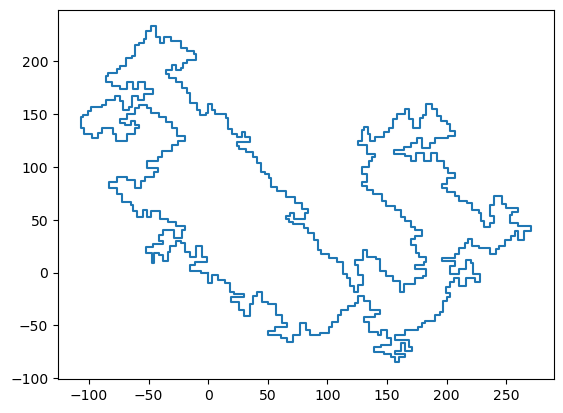

In [5]:
# loop through directions and adjust x,y coordinate based on number of steps and their direction

# init values
x_list = [0]
y_list = [0]
pos_x = 0
pos_y = 0
num_steps_idx = 0

# loop through the direction list and adjusting the x,y coordinate based on the direction and number of steps
for i in direction:
    if i == 'R':
        pos_x += steps[num_steps_idx]
    elif i == 'L':
        pos_x -= steps[num_steps_idx]
    elif i == 'U':
        pos_y += steps[num_steps_idx]
    elif i == 'D':
        pos_y -= steps[num_steps_idx]
    # append the x,y coordinate for each iteration
    x_list.append(pos_x)
    y_list.append(pos_y)
    num_steps_idx += 1
    print(pos_x, pos_y)

# visualize the results
plt.plot(x_list, y_list)

In [9]:
# find max and min x,y values 
print('X:',max(x_list),min(x_list))
print('Y:',max(y_list),min(y_list))

X: 271 -107
Y: 233 -85


X: 378 0
Y: 318 0


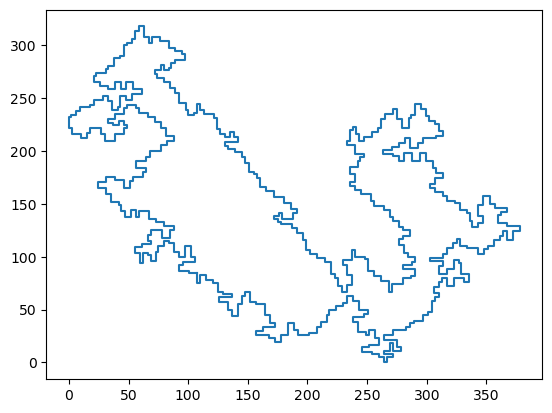

In [10]:
# push x,y values up so all values are positive; helps with filling in the hole
x_list_zeroed = [x+107 for x in x_list]
y_list_zeroed = [y+85 for y in y_list]
print('X:',max(x_list_zeroed),min(x_list_zeroed))
print('Y:',max(y_list_zeroed),min(y_list_zeroed))

# another chart to make sure zeroing was successful
plt.plot(x_list_zeroed, y_list_zeroed)

In [135]:
# empty list of lists of 0s
map = [[0] * (max(y_list_zeroed)+1) for _ in range(max(x_list_zeroed)+1)]
# how to call x,y points in list of lists: map[5][200]    x=5, y=200

In [136]:
# loop through values of x
for x in x_list_zeroed:
    # find the indices where the x is found
    y_idxs = [i for i, j in enumerate(x_list_zeroed) if j == x]
    # find the value of y for the index found above
    y_coor = [y_list_zeroed[i] for i in y_idxs]
    #loop through the 
    for k in y_coor:
        map[x][k] = 1

In [137]:
# nested loop through map which should 'fill in' the map
# 1 will represent the edges and 2 will be the inside; this allows us to stop on the outer edges before we fill outside the perimeter
for i in range(len(map)):
    for j in range(len(map[i])-1):
        # detects an edge and fills in the next location if it is currently empty
        if map[i][j] == 1 and map[i][j+1] == 0:
            #fills in the next location
            map[i][j+1] = 2
        # continues the filling process on inside locations
        if map[i][j] == 2 and map[i][j+1] == 0:
            map[i][j+1] = 2


In [138]:
counter1 = 0
counter2 = 0
for i in map:
    counter1 += i.count(1)
    counter2 += i.count(2)
print(counter1, counter2)

716 41560
